In [1]:
import numpy as np
import pandas as pd
from pymochy import Mochy
from datasets import EmailEnronFull

In [2]:
from motif import expected_degree_hypergraph

In [3]:
dataset = EmailEnronFull()
incidence_matrix = dataset.incidence_matrix(lambda e: len(e) > 1)

In [4]:
counts = pd.DataFrame(
    columns=["samples"] + [i for i in range(30)],
)
for samples in np.arange(0, incidence_matrix.shape[1], 20):
    print(samples)
    random_edges = np.random.choice(incidence_matrix.shape[1], samples, replace=False)
    filtered_incidence_matrix = incidence_matrix[:, random_edges]
    mochy = Mochy(filtered_incidence_matrix)
    motifs_count = mochy.count()
    counts.loc[len(counts)] = np.hstack([[samples], motifs_count])

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

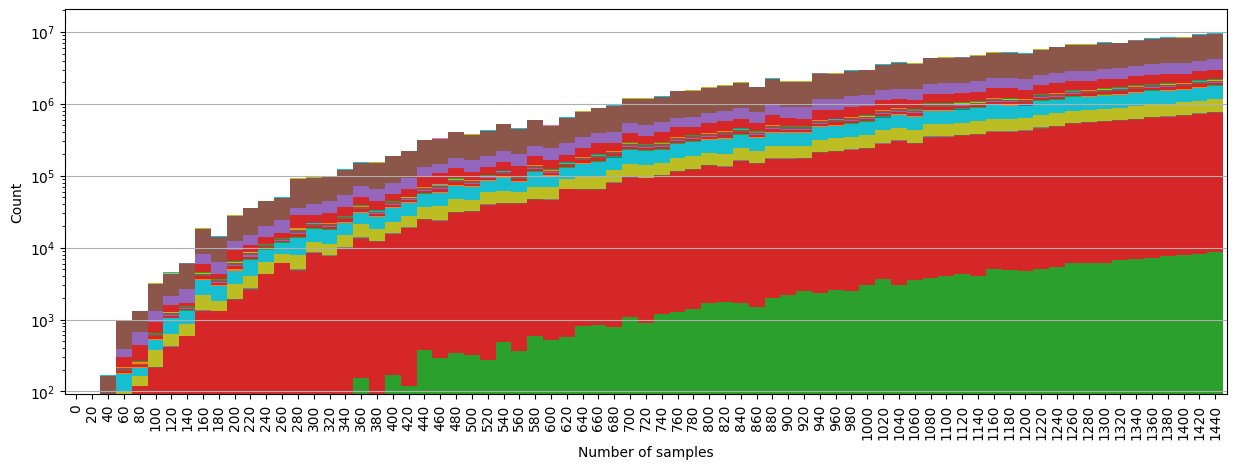

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
counts.plot(x="samples", y=[i for i in range(30)], kind="bar", legend=False, width=1, stacked=True, ax=ax)
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Number of samples")
plt.grid(axis="y")